In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#fetch data
#using tensorflow since the data is split into train and test
#%pip install -q tensorflow

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

#shape
print(train_images.shape)



2023-11-21 23:29:32.950637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)


In [ ]:
#create actual labels
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag',
               'Ankle boot']


In [3]:
#function to plot confusion matrix with labels instead of numbers


In [4]:

# Assuming class_names is a dictionary like {0: 'T-shirt/top', 1: 'Trouser', ...}
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Function to plot the image
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

# Function to plot the image with label using class names
def plot_image_label(image, label, class_names=class_names):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title(class_names[label])
    plt.show()

# Function to plot the images in a grid
def plot_grid(images, labels, rows, cols, class_names=class_names):
    fig = plt.figure(figsize=(2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='binary')
        plt.axis('off')
        plt.title(class_names[labels[i]])
    plt.show()

# Function to plot the images in a grid with prediction
def plot_grid_pred(images, labels, preds, rows, cols, class_names=class_names):
    fig = plt.figure(figsize=(2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='binary')
        plt.axis('off')
        plt.title(class_names[labels[i]] + ':' + class_names[preds[i]])
    plt.show()

# Function to plot the images in a grid with prediction and probability
def plot_grid_pred_prob(images, labels, preds, probs, rows, cols, class_names=class_names):
    fig = plt.figure(figsize=(2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='binary')
        plt.axis('off')
        title_text = f"{class_names[labels[i]]}:{class_names[preds[i]]}:{probs[i]:.2f}"
        plt.title(title_text)
    plt.show()

    


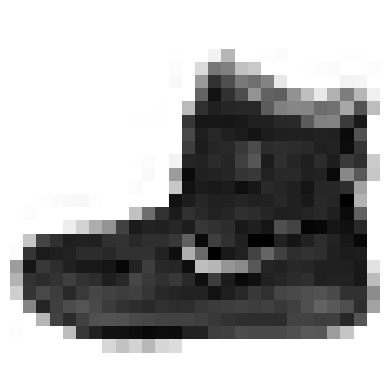

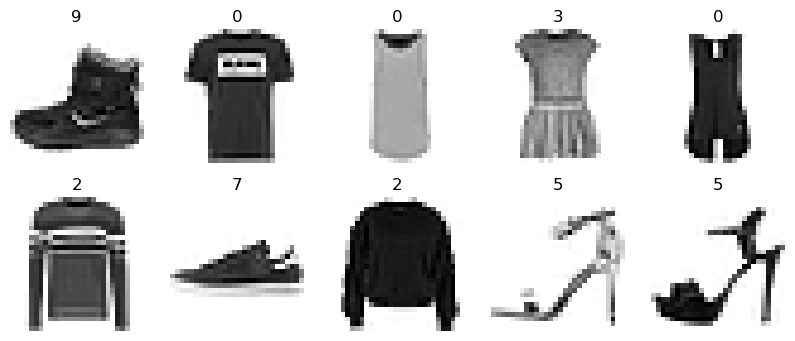

In [5]:
# view a random image
plot_image(train_images[0])
plot_grid(train_images,train_labels,2,5)


In [6]:
#normalize the data
train_images = train_images/255.0
test_images = test_images/255.0

#flatten the data
train_images = train_images.reshape(-1,28*28)
test_images = test_images.reshape(-1,28*28)


In [7]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#build the model
LogisticRegression = LogisticRegression(solver='saga',multi_class='multinomial',max_iter=10, n_jobs=-1)

#fit the model
LogisticRegression.fit(train_images,train_labels)

#predict
preds_LR = LogisticRegression.predict(test_images)


/Users/parsarezaei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


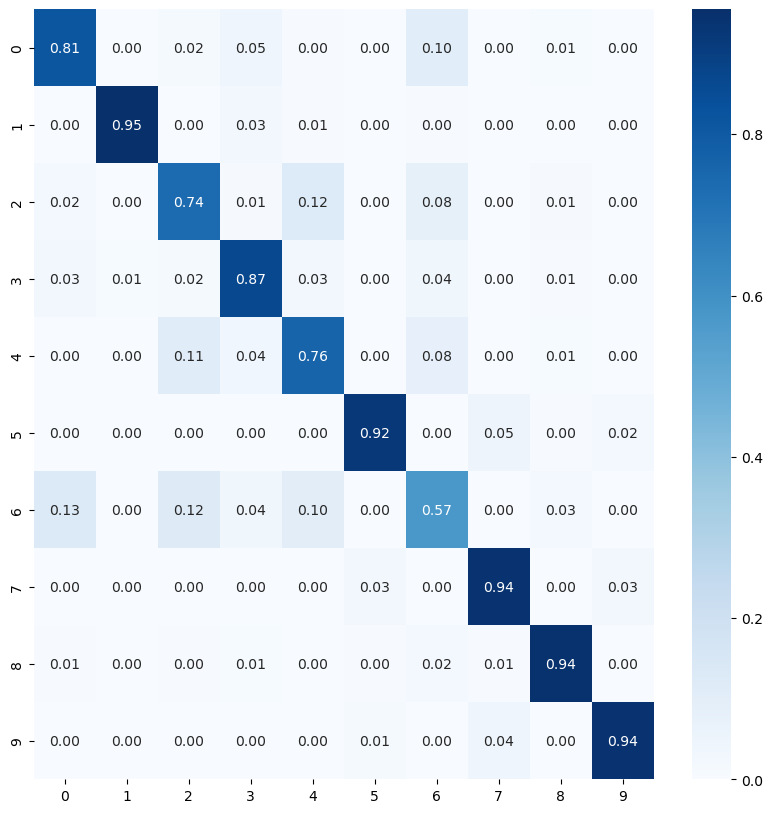

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,preds_LR)

#normalize the confusion matrix
cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

#plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='Blues')
plt.show()



# #accuracy
# from sklearn.metrics import accuracy_score
# accuracy_score(test_labels,preds_LR)




In [9]:
#SGD
from sklearn.linear_model import SGDClassifier
#build the model
SGDClassifier = SGDClassifier(loss='log_loss',max_iter=100, n_jobs=-1)
#fit the model
SGDClassifier.fit(train_images,train_labels)
#predict
preds_SGD = SGDClassifier.predict(test_images)


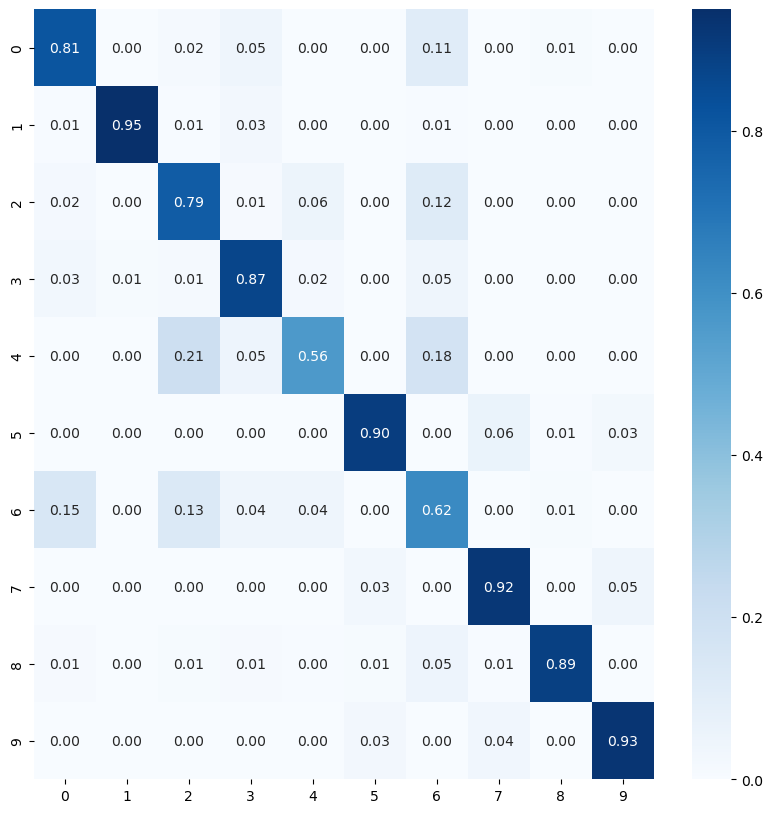

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,preds_SGD)

#normalize the confusion matrix
cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

#plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='Blues')
plt.show()


In [12]:
#SVM
from sklearn.svm import SVC
#build the model
SVC = SVC(kernel='linear',probability=True)
#fit the model
SVC.fit(train_images,train_labels)
#predict
preds_SVC = SVC.predict(test_images)


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
#build the model
RandomForestClassifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#fit the model
RandomForestClassifier.fit(train_images,train_labels)
#predict
preds_RF = RandomForestClassifier.predict(test_images)

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

#build the model
KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
#fit the model
KNeighborsClassifier.fit(train_images,train_labels)
#predict
preds_KNN = KNeighborsClassifier.predict(test_images)


In [ ]:
#cnn
#reshape the data
train_images_nn = train_images.reshape(-1,28,28,1)
test_images_nn = test_images.reshape(-1,28,28,1)

#build the model
model = keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#fit the model
model.fit(train_images_nn,train_labels,epochs=5)

#predict
preds_nn = model.predict(test_images_nn)


In [ ]:
#halving grid search
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#build the models
SGDClassifier = SGDClassifier(loss='log_loss',max_iter=100, n_jobs=-1)
RandomForestClassifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
SVC = SVC(kernel='linear',probability=True)
KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

#build the parameter grid
param_grid_SGD = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
param_grid_RF = {'n_estimators':[10,100,200,300,400,500]}
param_grid_SVC = {'C':[0.001,0.01,0.1,1,10,100]}
param_grid_KNN = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
param_grids = [param_grid_SGD,param_grid_RF,param_grid_SVC,param_grid_KNN]

#build the grid search
grid_searches = []
for param_grid, model in zip(param_grids,[SGDClassifier,RandomForestClassifier,SVC,KNeighborsClassifier]):
    grid_search = HalvingGridSearchCV(model,param_grid,cv=3,verbose=1,n_jobs=-1)
    grid_searches.append(grid_search)
    
#fit the grid search
for grid_search in grid_searches:
    grid_search.fit(train_images,train_labels)
    
#predict
preds_SGD_grid = grid_searches[0].predict(test_images)
preds_RF_grid = grid_searches[1].predict(test_images)
preds_SVC_grid = grid_searches[2].predict(test_images)
preds_KNN_grid = grid_searches[3].predict(test_images)


